In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
from logistics import new_cav_model , J_analytical_new, fourier_transform_matrix, fast_f_t, spectrum_1
from logistics_exact_cavity import Driven_cavity_class,two_modes_cavity
from numpy.fft import fft,fftfreq
from scipy.interpolate import interp1d	
from matplotlib import gridspec

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  


From today's meeting, we agreed that a Thorough exploration of the spectrum needs to be done. The message I take is
1. verify the fourier transform. change dt and t_max
2. it is more interesting to show what happens when $\gamma \tau $ grows 

# 0. trash (delete in the future)

In [ ]:
def average_fft(x, y, Ms):
	spectra = []
	freqs_list = []

	for M in Ms:
		omega, A = fast_f_t(x, y, M)
		freqs_list.append(omega)
		spectra.append(A)

	omega_min = max(freqs[0] for freqs in freqs_list)     # límite inferior común
	omega_max = min(freqs[-1] for freqs in freqs_list)    # límite superior común
	N_common = max(len(f) for f in freqs_list)            # densidad similar a la mayor
	omega_common = np.linspace(omega_min, omega_max, N_common)


	spectra_interp = []
	for omega, A in zip(freqs_list, spectra):
		f_interp = interp1d(omega, A, kind='linear', bounds_error=False, fill_value=0.0)
		spectra_interp.append(f_interp(omega_common))

	A_avg = np.mean(spectra_interp, axis=0)

	return omega_common, A_avg

In [81]:
gamma = 0.8
phi = 2*np.pi
tau = 1 
t_max = 200 * tau
dt = tau/100


In [82]:
model = new_cav_model(gamma,phi,tau)
model.evolve(t_max,dt)
t,e = model.excited_state([1,0])
a_out_flat = model.a_out_array[:,2]


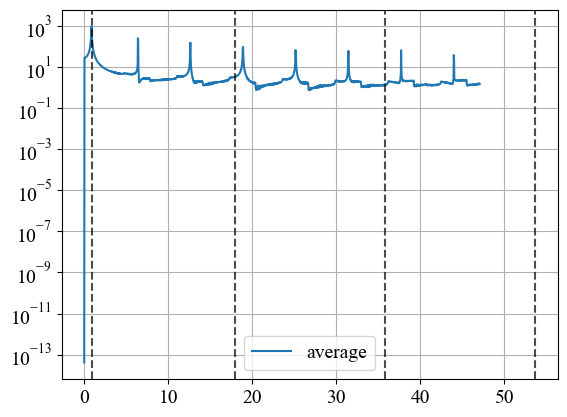

In [83]:
M_flatten = np.arange(3000,3051,1)
w_def,u_def = average_fft(t,a_out_flat,M_flatten)

plt.plot(w_def,u_def,label='average')
plt.grid()
plt.legend()
plt.axvline(np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(20*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(40*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(60*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
#plt.axvline(np.sqrt(gamma/tau))
plt.yscale('log')
plt.show()

# 1. Spectrum as a function of $\gamma \tau $ 

In [34]:
phi = 2*np.pi
tau = 1 
t_max = 200 * tau
dt = tau/75
gamma_0 = 5

gamma_values = np.linspace(0.1,15,150)


In [35]:
w_list = []
u_list = []
t_list = []
e_list = []
M_flatten = np.arange(3200,3251,1)

for gamma_point in gamma_values:
	model = new_cav_model(gamma_point,phi,tau)
	model.evolve(t_max,dt)
	t,e = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	t_list.append(t)
	e_list.append(e)
	u_list.append(u)
	w_list.append(w)

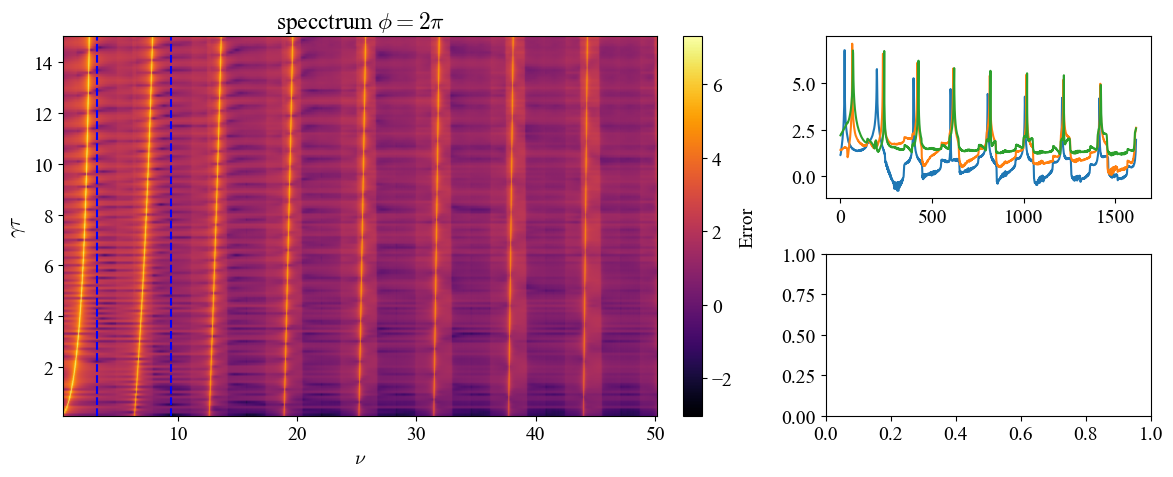

In [37]:
u_map = np.asarray(u_list)
u_map = np.log(u_map[:,10:])
wr = w_list[0]

gamma_cut = 8

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
    u_map,
    origin='lower',
    aspect='auto',
    extent=[ wr[10], wr[-1],gamma_values[0], gamma_values[-1],],
    cmap='inferno'
)
ax_heat.set_xlabel(r'$ \nu $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = 2\pi $')

ax_heat.axvline(np.pi, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi, color='b', linestyle='--', linewidth=1.5)

cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(u_map[10,:])
ax_top.plot(u_map[100,:])
ax_top.plot(u_map[130,:])

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

In [38]:
np.savez('mis_arrays.npz', u_map=u_map)